In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [34]:
W1 = np.array([[0.014, 0.017, 0.12],
               [0.005, 0.023, 0.322],
               [0.034, 0.024, 0.044],
               [0.018, 0.161, 0.053], 
               [0.014, 0.053, 0.041], 
               [0.034, 0.036, 0.081], 
              ])
b1 = np.array([[0.03],
               [0.05],
               [0.04], 
               [0.02], 
               [0.06], 
               [0.02], 
              ])
W2 = np.array([[0.05, 0.06, 0.07, 0.04, 0.07, 0.36]])
b2 = np.array([[0.07]])



# Input dataset: each row is a sample
X = np.array([
    [8], 
    [3],
    [68]
])
y = np.array([
    [0.84]
])


In [38]:
a0 = X
eta = 0.22


z1 = W1 @ a0 + b1
a1 = sigmoid(z1)

z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

# Loss
error = a2 - y
loss = 0.5 * error.T @ error
# print(f"{error}")

# Backward pass
delta2 = error * sigmoid_derivative(z2)
delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)

# Weight updates
W2 = W2 - eta * delta2 @ a1.T
b2 = b2 - eta * delta2

W1 = W1 - eta * delta1 @ a0.T
b1 = b1 - eta * delta1

# print(a1)
print(a2)
# print(loss)
# print(W1)
# print(error)

[[0.8363552]]


In [36]:
losses = []
epochs = 100
a0 = X

for epoch in range(epochs):
    total_loss = 0    

    z1 = W1 @ a0 + b1
    a1 = sigmoid(z1)

    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    # Loss
    error = a2 - y
    loss = 0.5 * error.T @ error
    # print(f"{error}")

    # Backward pass
    delta2 = error * sigmoid_derivative(z2)
    delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)

    # Weight updates
    W2 = W2 - eta * delta2 @ a1.T
    b2 = b2 - eta * delta2

    W1 = W1 - eta * delta1 @ a0.T
    b1 = b1 - eta * delta1

    losses.append(loss[0][0])
    # print(total_loss[0][0])

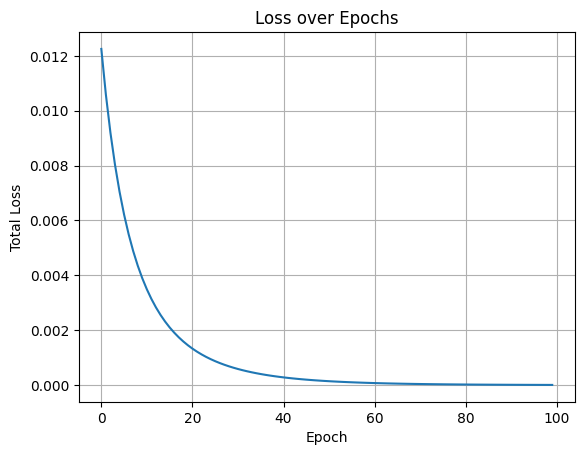

In [37]:
sns.lineplot(losses)
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()